In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(42)
from sklearn.metrics import confusion_matrix
import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cancer_data=pd.read_csv('/content/gdrive/MyDrive/data/HAM10000/HAM10000_metadata.csv',sep=',',header=0)
cancer_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
cancer_data.shape

(10015, 7)

In [ ]:
size =32

In [ ]:
le = LabelEncoder()
le.fit(cancer_data['dx'])
LabelEncoder()
print(list(le.classes_))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [ ]:
cancer_data['label']=le.transform(cancer_data['dx'])
print(cancer_data.sample(10))

        lesion_id      image_id   dx  ...     sex     localization label
1617  HAM_0007180  ISIC_0033272  mel  ...    male             face     4
8128  HAM_0007195  ISIC_0031923   nv  ...  female  lower extremity     5
2168  HAM_0001835  ISIC_0026652  mel  ...    male             back     4
1090  HAM_0000465  ISIC_0030583  bkl  ...  female            trunk     2
7754  HAM_0001720  ISIC_0034010   nv  ...    male          abdomen     5
8071  HAM_0006333  ISIC_0024424   nv  ...    male            trunk     5
7423  HAM_0004548  ISIC_0032832   nv  ...  female  upper extremity     5
8984  HAM_0006526  ISIC_0026671   nv  ...    male  lower extremity     5
2310  HAM_0003102  ISIC_0032389  mel  ...    male             face     4
7256  HAM_0004260  ISIC_0025525   nv  ...    male             back     5

[10 rows x 8 columns]


In [ ]:
cancer_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,2


In [ ]:
cancer_data.shape

(10015, 8)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


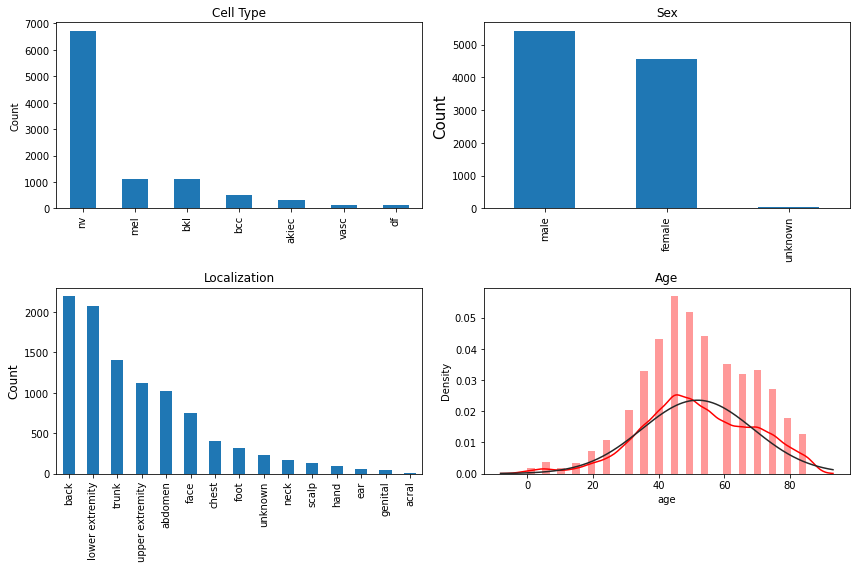

In [ ]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(221)
cancer_data['dx'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type');

ax2 = fig.add_subplot(222)
cancer_data['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count', size=15)
ax2.set_title('Sex');

ax3 = fig.add_subplot(223)
cancer_data['localization'].value_counts().plot(kind='bar')
ax3.set_ylabel('Count',size=12)
ax3.set_title('Localization')

ax4 = fig.add_subplot(224)
sample_age = cancer_data[pd.notnull(cancer_data['age'])]
sns.distplot(sample_age['age'], fit=stats.norm, color='red');
ax4.set_title('Age')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.utils import resample

In [ ]:
print(cancer_data['label'].value_counts())

5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: label, dtype: int64


In [ ]:
df_0 = cancer_data[cancer_data['label']==0]
df_1 = cancer_data[cancer_data['label']==1]
df_2 = cancer_data[cancer_data['label']==2]
df_3 = cancer_data[cancer_data['label']==3]
df_4 = cancer_data[cancer_data['label']==4]
df_5 = cancer_data[cancer_data['label']==5]
df_6 = cancer_data[cancer_data['label']==6]

In [ ]:
df_0.shape

(327, 8)

In [ ]:
n_samples = 500

In [ ]:
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42) 
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42) 
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)

In [ ]:
data_cancer_balanced = pd.concat([df_0_balanced,df_1_balanced,df_2_balanced,
                                  df_3_balanced,df_4_balanced,df_5_balanced,
                                  df_6_balanced])

In [ ]:
data_cancer_balanced.shape

(3500, 8)

In [ ]:
print(data_cancer_balanced['label'].value_counts())

5    500
3    500
1    500
6    500
4    500
2    500
0    500
Name: label, dtype: int64


In [ ]:
data_cancer_balanced.shape

(3500, 8)

In [ ]:
images_path = {os.path.splitext(os.path.basename(x))[0]: x
               for x in glob(os.path.join('/content/gdrive/MyDrive/data/HAM10000/','*','*.jpg'))}

In [ ]:
print(images_path)

{'ISIC_0033321': '/content/gdrive/MyDrive/data/HAM10000/HAM10000_images_part_2/ISIC_0033321.jpg', 'ISIC_0033330': '/content/gdrive/MyDrive/data/HAM10000/HAM10000_images_part_2/ISIC_0033330.jpg', 'ISIC_0033325': '/content/gdrive/MyDrive/data/HAM10000/HAM10000_images_part_2/ISIC_0033325.jpg', 'ISIC_0033327': '/content/gdrive/MyDrive/data/HAM10000/HAM10000_images_part_2/ISIC_0033327.jpg', 'ISIC_0033324': '/content/gdrive/MyDrive/data/HAM10000/HAM10000_images_part_2/ISIC_0033324.jpg', 'ISIC_0033322': '/content/gdrive/MyDrive/data/HAM10000/HAM10000_images_part_2/ISIC_0033322.jpg', 'ISIC_0033328': '/content/gdrive/MyDrive/data/HAM10000/HAM10000_images_part_2/ISIC_0033328.jpg', 'ISIC_0033331': '/content/gdrive/MyDrive/data/HAM10000/HAM10000_images_part_2/ISIC_0033331.jpg', 'ISIC_0033320': '/content/gdrive/MyDrive/data/HAM10000/HAM10000_images_part_2/ISIC_0033320.jpg', 'ISIC_0033319': '/content/gdrive/MyDrive/data/HAM10000/HAM10000_images_part_2/ISIC_0033319.jpg', 'ISIC_0033318': '/content/gdr

In [ ]:
data_cancer_balanced['path'] = cancer_data['image_id'].map(images_path.get)

In [ ]:
data_cancer_balanced.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,label,path
9789,HAM_0003136,ISIC_0026645,akiec,histo,65.0,male,back,0,/content/gdrive/MyDrive/data/HAM10000/HAM10000...
9957,HAM_0006587,ISIC_0025780,akiec,histo,70.0,male,face,0,/content/gdrive/MyDrive/data/HAM10000/HAM10000...
9793,HAM_0005505,ISIC_0024450,akiec,histo,50.0,male,upper extremity,0,/content/gdrive/MyDrive/data/HAM10000/HAM10000...
9758,HAM_0003455,ISIC_0027896,akiec,histo,75.0,male,hand,0,/content/gdrive/MyDrive/data/HAM10000/HAM10000...
9875,HAM_0005459,ISIC_0029268,akiec,histo,85.0,male,upper extremity,0,/content/gdrive/MyDrive/data/HAM10000/HAM10000...


In [ ]:
data_cancer_balanced['image'] = data_cancer_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((size,size))))
#data_cancer_balanced['image'] = data_cancer_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))

In [ ]:
data_cancer_balanced.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,label,path,image
9789,HAM_0003136,ISIC_0026645,akiec,histo,65.0,male,back,0,/content/gdrive/MyDrive/data/HAM10000/HAM10000...,"[[[155, 118, 107], [162, 126, 118], [174, 140,..."
9957,HAM_0006587,ISIC_0025780,akiec,histo,70.0,male,face,0,/content/gdrive/MyDrive/data/HAM10000/HAM10000...,"[[[138, 76, 82], [131, 64, 68], [139, 73, 81],..."
9793,HAM_0005505,ISIC_0024450,akiec,histo,50.0,male,upper extremity,0,/content/gdrive/MyDrive/data/HAM10000/HAM10000...,"[[[123, 86, 87], [174, 137, 137], [197, 161, 1..."
9758,HAM_0003455,ISIC_0027896,akiec,histo,75.0,male,hand,0,/content/gdrive/MyDrive/data/HAM10000/HAM10000...,"[[[205, 149, 175], [207, 149, 169], [214, 158,..."
9875,HAM_0005459,ISIC_0029268,akiec,histo,85.0,male,upper extremity,0,/content/gdrive/MyDrive/data/HAM10000/HAM10000...,"[[[203, 174, 199], [205, 174, 197], [206, 175,..."


#Plotting images

In [ ]:
n_images = 5 # number of images plotting

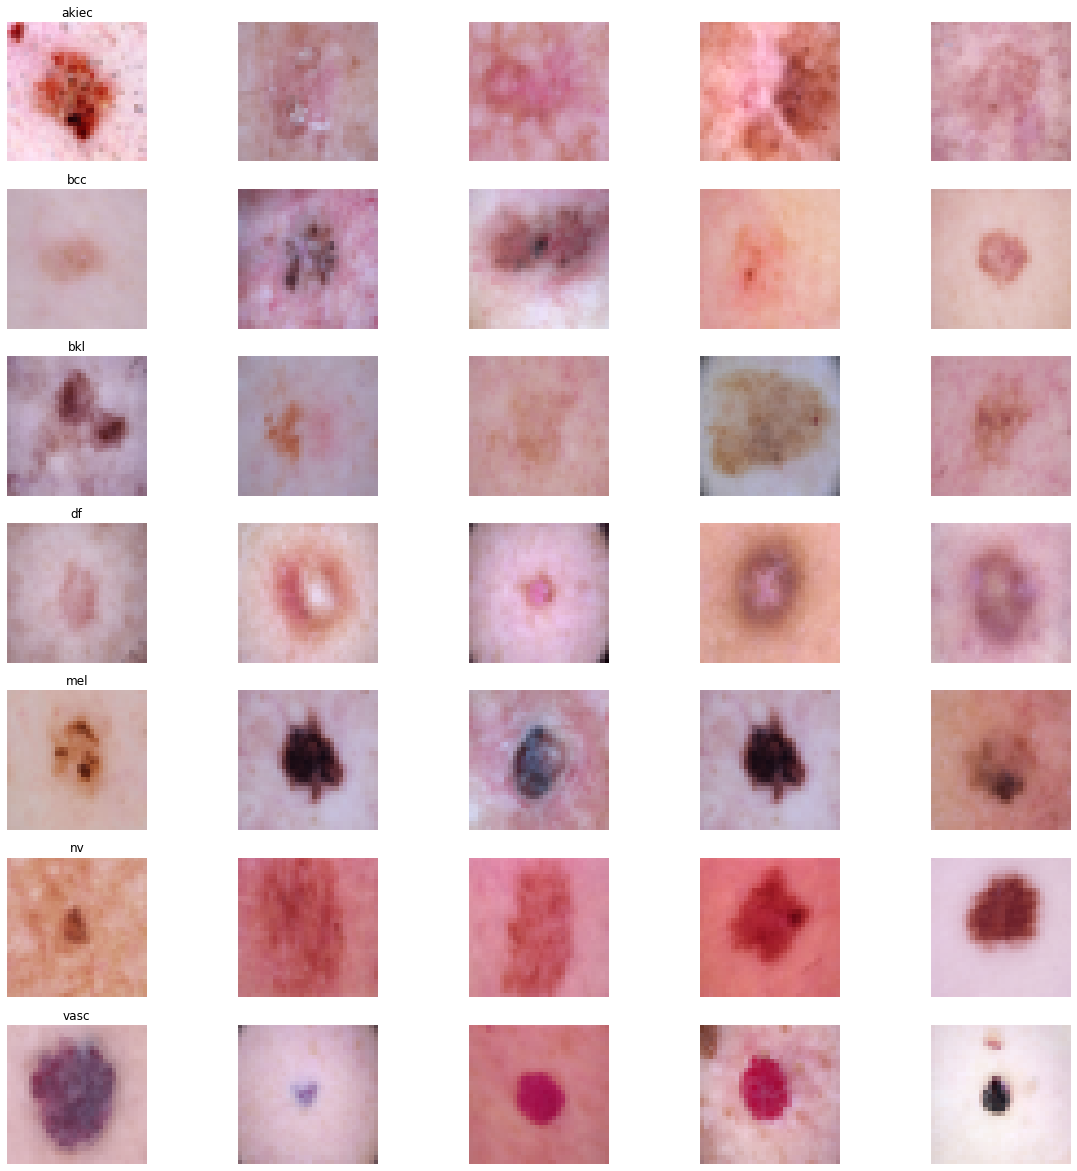

In [ ]:
fig, m_axs = plt.subplots(7, n_images, figsize = (4*n_images, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         data_cancer_balanced.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_images, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

#split training & testing

In [ ]:
X = np.asarray(data_cancer_balanced['image'].tolist())

In [ ]:
X = X/255.

In [ ]:
X.shape

(3500, 32, 32, 3)

In [ ]:
Y = data_cancer_balanced['label']

In [ ]:
Y_cat = to_categorical(Y,num_classes = 7)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.1, random_state=42)

#Model

In [ ]:
num_classes = 7

In [ ]:
model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(size, size, 3)))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(32))
model.add(Dense(7, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 256)       7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)         

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
batch_size = 16 
epochs = 50

In [ ]:
history = model.fit(x_train, y_train,epochs=epochs,batch_size = batch_size,validation_data=(x_test, y_test),verbose=1)

Epoch 1/50
197/197 [==============================] - 46s 9ms/step - loss: 1.9431 - accuracy: 0.1576 - val_loss: 1.8030 - val_accuracy: 0.2543
Epoch 2/50
197/197 [==============================] - 1s 6ms/step - loss: 1.7087 - accuracy: 0.3009 - val_loss: 1.4871 - val_accuracy: 0.3857
Epoch 3/50
197/197 [==============================] - 1s 5ms/step - loss: 1.4897 - accuracy: 0.3932 - val_loss: 1.4591 - val_accuracy: 0.3886
Epoch 4/50
197/197 [==============================] - 1s 5ms/step - loss: 1.4538 - accuracy: 0.4081 - val_loss: 1.3273 - val_accuracy: 0.5229
Epoch 5/50
197/197 [==============================] - 1s 5ms/step - loss: 1.3488 - accuracy: 0.4715 - val_loss: 1.3180 - val_accuracy: 0.4514
Epoch 6/50
197/197 [==============================] - 1s 5ms/step - loss: 1.3553 - accuracy: 0.4682 - val_loss: 1.2802 - val_accuracy: 0.5114
Epoch 7/50
197/197 [==============================] - 1s 5ms/step - loss: 1.2997 - accuracy: 0.4984 - val_loss: 1.3195 - val_accuracy: 0.4400
Epoch

In [ ]:
score = model.evaluate(x_train,y_train,verbose=0)
print('test loss = ',score[0])
print('accuracy = ',score[1])

test loss =  0.3978680968284607
accuracy =  0.8898412585258484


In [ ]:
score = model.evaluate(x_test,y_test,verbose=0)
print('test loss = ',score[0])
print('accuracy = ',score[1])

test loss =  0.755998969078064
accuracy =  0.7428571581840515


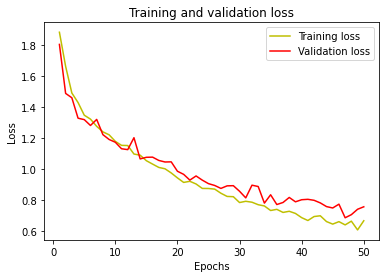

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

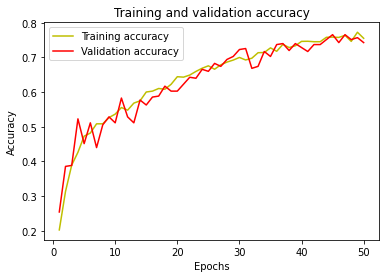

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Predictions

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred_classes = np.argmax(y_pred, axis = 1) 

In [ ]:
y_true = np.argmax(y_test, axis = 1) 

In [ ]:
cm = confusion_matrix(y_true, y_pred_classes)

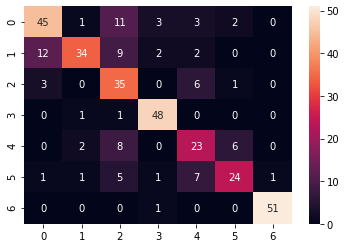

In [ ]:
sns.heatmap(cm,annot=True,fmt='g')

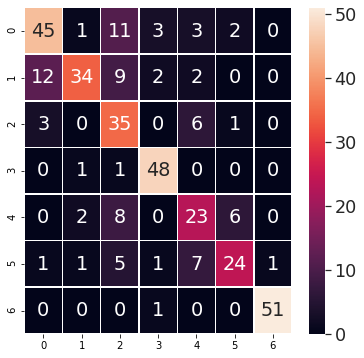

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

Text(0, 0.5, 'Fraction of incorrect predictions')

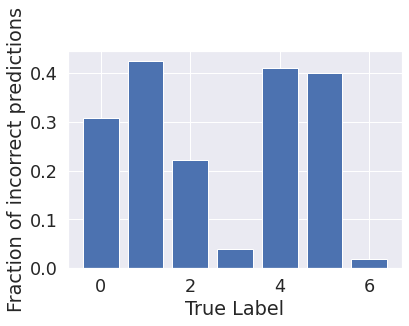

In [ ]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(7), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')